# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [70]:
# Written description of three observable trends based on the data:

# Obeserved Trend 1: Temperature decreases towards higher latitude in the Northen Hemisphere. Likewise, temperature
#                    in the Southern Hemisphere towards lower latitudes. The highest temperatures occur in the equator, 
#                    in between the northern and southern hemispheres, which is also evident in the 'Latitude vs 
#                    Temperature' scatter plot. 

# Obeserved Trend 2: Wind Speed, Humidity, and Cloudiness are not directly influenced by Latitude as shown in the 
#                    scatter plots. They are more directly influenced by Temperatures, which is not plotted. 

# Obeserved Trend 3: Cloudiness has no direct relationship with Temperature, Wind Speed, and Humidity. Humidity 
#                    appears to depend on Temperature when comparing the 'Latitude vs Temperature' and 'Latitude vs 
#                    Humidity'. At higher temperatures, the percentage of humidity is also high. 

In [18]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import date
from pprint import pprint
from scipy.stats import linregress
import seaborn as sns # seaborn library for graph aesthetics 
import json
import csv

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude (python citypy library)
from citipy import citipy

# Output File (CSV)
output_data_file = "Output_data/cities2.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
total_cities = len(cities)
total_cities

608

In [3]:
cities


['semey',
 'teguise',
 'hobart',
 'faya',
 'patnongon',
 'vila velha',
 'amderma',
 'puerto escondido',
 'nizhneyansk',
 'hovd',
 'katsuura',
 'nikolskoye',
 'lovozero',
 'new norfolk',
 'dikson',
 'maryville',
 'yellowknife',
 'saint anthony',
 'vaini',
 'cape town',
 'hilo',
 'ponta do sol',
 'tuktoyaktuk',
 'beringovskiy',
 'mataura',
 'izumo',
 'isangel',
 'saldanha',
 'hithadhoo',
 'saskylakh',
 'maniitsoq',
 'makakilo city',
 'busselton',
 'rikitea',
 'barrow',
 'jamestown',
 'ushuaia',
 'punta arenas',
 'falealupo',
 'chirongui',
 'saint-francois',
 'khatanga',
 'montmagny',
 'tefe',
 'flin flon',
 'grand gaube',
 'thompson',
 'fujin',
 'barentsburg',
 'verkhoyansk',
 'keta',
 'golden',
 'attawapiskat',
 'paamiut',
 'elko',
 'shingu',
 'teknaf',
 'tuatapere',
 'progreso',
 'chokurdakh',
 'bengkulu',
 'brits',
 'bethel',
 'anadyr',
 'erie',
 'kayerkan',
 'coihaique',
 'road town',
 'taolanaro',
 'bluff',
 'santa cruz',
 'castro',
 'djenne',
 'saint george',
 'adrar',
 'bandarbeyl

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial" #fahrenheit 

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q='

In [13]:
# set up lists to hold reponse info
cities_2 = []
lat = []
lng = []
max_temp = []
humid = []
cloud = []
wind = []
country = []
date = []

count = 1
not_found = 0

# set up a parameters dictionary
# params = {"units": "imperial", "appid": weather_api_key}
                      
# Loop through the list of cities and perform a request for data on each
print('------------------------------')
print('Begin Data Retrieval')

for city in cities:
    try: 
        city_name = city.replace(" ", "%20") # Delete spaces in between city names when adding it to the url
        q_url = str(query_url + city_name)
        # Create search query, make request and store in json
        response = (requests.get(q_url)).json()
        
        city_id = response.get("id")
        print('------------------------------')
        print(f'Processing {count} of {total_cities}:  {city} (ID: {city_id})' )
        print(q_url)
        #print(response)
        
        max_temp.append(response.get("main").get("temp_max"))
        cities_2.append(response.get("name"))
        lat.append(response.get("coord").get("lat"))
        lng.append(response.get("coord").get("lon"))
        humid.append(response.get("main").get("humidity"))
        cloud.append(response.get("clouds").get("all"))
        wind.append(response.get("wind").get("speed"))
        country.append(response.get("sys").get("country"))
        date.append(response.get("dt"))
        print(f"{city} found! Data Retrieved.")
        
        count = count + 1 
        
        # loop to limit API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        if count % 59 == 0:
            time.sleep(1)
            
    except (AttributeError, KeyError, TypeError) as e:
        print("Not Found.")
        count = count + 1 
        not_found = not_found + 1 

print('------------------------------')
print("End of Data Retrieval")
print('------------------------------')
print(f'{not_found} out of {count-1} cities not found.')

------------------------------
Begin Data Retrieval
------------------------------
Processing 1 of 608:  semey (ID: 1519422)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=semey
semey found! Data Retrieved.
------------------------------
Processing 2 of 608:  teguise (ID: 2510573)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=teguise
teguise found! Data Retrieved.
------------------------------
Processing 3 of 608:  hobart (ID: 2163355)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=hobart
hobart found! Data Retrieved.
------------------------------
Processing 4 of 608:  faya (ID: 110690)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=faya
faya found! Data Retrieved.
------------------------------
Processing 5 of 608:  patnongon (ID: 1694365)
http://api.openweather

------------------------------
Processing 38 of 608:  punta arenas (ID: 3874787)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=punta%20arenas
punta arenas found! Data Retrieved.
------------------------------
Processing 39 of 608:  falealupo (ID: None)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=falealupo
Not Found.
------------------------------
Processing 40 of 608:  chirongui (ID: 1090415)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=chirongui
chirongui found! Data Retrieved.
------------------------------
Processing 41 of 608:  saint-francois (ID: 2980080)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=saint-francois
saint-francois found! Data Retrieved.
------------------------------
Processing 42 of 608:  khatanga (ID: 2022572)
http://api.openweathermap.

------------------------------
Processing 76 of 608:  bandarbeyla (ID: 64814)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=bandarbeyla
bandarbeyla found! Data Retrieved.
------------------------------
Processing 77 of 608:  albany (ID: 5106841)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=albany
albany found! Data Retrieved.
------------------------------
Processing 78 of 608:  quatre cocos (ID: 1106643)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=quatre%20cocos
quatre cocos found! Data Retrieved.
------------------------------
Processing 79 of 608:  bredasdorp (ID: 1015776)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=bredasdorp
bredasdorp found! Data Retrieved.
------------------------------
Processing 80 of 608:  salto (ID: 3440714)
http://api.openweathe

------------------------------
Processing 113 of 608:  torbay (ID: 6167817)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=torbay
torbay found! Data Retrieved.
------------------------------
Processing 114 of 608:  ribeira grande (ID: 3372707)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=ribeira%20grande
ribeira grande found! Data Retrieved.
------------------------------
Processing 115 of 608:  bambous virieux (ID: 1106677)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=bambous%20virieux
bambous virieux found! Data Retrieved.
------------------------------
Processing 116 of 608:  skelleftea (ID: 602913)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=skelleftea
skelleftea found! Data Retrieved.
------------------------------
Processing 117 of 608:  butaritari (ID:

------------------------------
Processing 150 of 608:  cherskiy (ID: 2126199)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=cherskiy
cherskiy found! Data Retrieved.
------------------------------
Processing 151 of 608:  ahipara (ID: 2194098)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=ahipara
ahipara found! Data Retrieved.
------------------------------
Processing 152 of 608:  aguimes (ID: 2522325)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=aguimes
aguimes found! Data Retrieved.
------------------------------
Processing 153 of 608:  morro bay (ID: 5374920)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=morro%20bay
morro bay found! Data Retrieved.
------------------------------
Processing 154 of 608:  pasni (ID: 1168312)
http://api.openweathermap.org/data/2.5

------------------------------
Processing 187 of 608:  goderich (ID: 5962442)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=goderich
goderich found! Data Retrieved.
------------------------------
Processing 188 of 608:  pimenta bueno (ID: 3924908)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=pimenta%20bueno
pimenta bueno found! Data Retrieved.
------------------------------
Processing 189 of 608:  qaanaaq (ID: 3831208)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=qaanaaq
qaanaaq found! Data Retrieved.
------------------------------
Processing 190 of 608:  yinchuan (ID: 1786657)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=yinchuan
yinchuan found! Data Retrieved.
------------------------------
Processing 191 of 608:  dandong (ID: 2037886)
http://api.openweathe

------------------------------
Processing 225 of 608:  carutapera (ID: 3402648)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=carutapera
carutapera found! Data Retrieved.
------------------------------
Processing 226 of 608:  hamilton (ID: 4513583)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=hamilton
hamilton found! Data Retrieved.
------------------------------
Processing 227 of 608:  tasiilaq (ID: 3424607)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=tasiilaq
tasiilaq found! Data Retrieved.
------------------------------
Processing 228 of 608:  sao geraldo do araguaia (ID: 3388760)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=sao%20geraldo%20do%20araguaia
sao geraldo do araguaia found! Data Retrieved.
------------------------------
Processing 229 of 608:  

------------------------------
Processing 262 of 608:  kiruna (ID: 605155)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=kiruna
kiruna found! Data Retrieved.
------------------------------
Processing 263 of 608:  colina (ID: 3465935)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=colina
colina found! Data Retrieved.
------------------------------
Processing 264 of 608:  kosh-agach (ID: 1502422)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=kosh-agach
kosh-agach found! Data Retrieved.
------------------------------
Processing 265 of 608:  mafinga (ID: 155405)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=mafinga
mafinga found! Data Retrieved.
------------------------------
Processing 266 of 608:  clyde river (ID: 5924351)
http://api.openweathermap.org/data/2.5/wea

------------------------------
Processing 299 of 608:  tsihombe (ID: None)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=tsihombe
Not Found.
------------------------------
Processing 300 of 608:  sibu (ID: 1735902)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=sibu
sibu found! Data Retrieved.
------------------------------
Processing 301 of 608:  barcelona (ID: 3128760)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=barcelona
barcelona found! Data Retrieved.
------------------------------
Processing 302 of 608:  homer (ID: 5864145)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=homer
homer found! Data Retrieved.
------------------------------
Processing 303 of 608:  coahuayana (ID: 4013679)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966c

------------------------------
Processing 336 of 608:  xilitla (ID: 3514502)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=xilitla
xilitla found! Data Retrieved.
------------------------------
Processing 337 of 608:  la palma (ID: 5364022)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=la%20palma
la palma found! Data Retrieved.
------------------------------
Processing 338 of 608:  aklavik (ID: 5882953)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=aklavik
aklavik found! Data Retrieved.
------------------------------
Processing 339 of 608:  general roca (ID: 3855065)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=general%20roca
general roca found! Data Retrieved.
------------------------------
Processing 340 of 608:  warqla (ID: None)
http://api.openweathermap.org

------------------------------
Processing 374 of 608:  antalaha (ID: 1071296)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=antalaha
antalaha found! Data Retrieved.
------------------------------
Processing 375 of 608:  hofn (ID: 2630299)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=hofn
hofn found! Data Retrieved.
------------------------------
Processing 376 of 608:  sur (ID: 286245)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=sur
sur found! Data Retrieved.
------------------------------
Processing 377 of 608:  zhezkazgan (ID: 1516589)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=zhezkazgan
zhezkazgan found! Data Retrieved.
------------------------------
Processing 378 of 608:  acapulco (ID: 3533462)
http://api.openweathermap.org/data/2.5/weather?appid=37d

------------------------------
Processing 412 of 608:  tura (ID: 1254046)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=tura
tura found! Data Retrieved.
------------------------------
Processing 413 of 608:  bykovo (ID: 570298)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=bykovo
bykovo found! Data Retrieved.
------------------------------
Processing 414 of 608:  kantunil (ID: 3526301)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=kantunil
kantunil found! Data Retrieved.
------------------------------
Processing 415 of 608:  yemelyanovo (ID: 1486031)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=yemelyanovo
yemelyanovo found! Data Retrieved.
------------------------------
Processing 416 of 608:  ostersund (ID: 2685750)
http://api.openweathermap.org/data/2.5/weat

------------------------------
Processing 450 of 608:  sangueya (ID: 2416061)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=sangueya
sangueya found! Data Retrieved.
------------------------------
Processing 451 of 608:  inndyr (ID: 3151056)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=inndyr
inndyr found! Data Retrieved.
------------------------------
Processing 452 of 608:  olafsvik (ID: 3414079)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=olafsvik
olafsvik found! Data Retrieved.
------------------------------
Processing 453 of 608:  hualmay (ID: 3939761)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=hualmay
hualmay found! Data Retrieved.
------------------------------
Processing 454 of 608:  ludza (ID: 457776)
http://api.openweathermap.org/data/2.5/weather?

------------------------------
Processing 487 of 608:  sao borja (ID: 3449340)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=sao%20borja
sao borja found! Data Retrieved.
------------------------------
Processing 488 of 608:  ust-barguzin (ID: 2013986)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=ust-barguzin
ust-barguzin found! Data Retrieved.
------------------------------
Processing 489 of 608:  bystryy istok (ID: 1508517)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=bystryy%20istok
bystryy istok found! Data Retrieved.
------------------------------
Processing 490 of 608:  aden (ID: 415189)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=aden
aden found! Data Retrieved.
------------------------------
Processing 491 of 608:  mogadishu (ID: 53654)
http://api.ope

------------------------------
Processing 524 of 608:  bilibino (ID: 2126682)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=bilibino
bilibino found! Data Retrieved.
------------------------------
Processing 525 of 608:  ijaki (ID: None)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=ijaki
Not Found.
------------------------------
Processing 526 of 608:  wenling (ID: 1791464)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=wenling
wenling found! Data Retrieved.
------------------------------
Processing 527 of 608:  mufumbwe (ID: 905382)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=mufumbwe
mufumbwe found! Data Retrieved.
------------------------------
Processing 528 of 608:  mocambique (ID: None)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc

------------------------------
Processing 562 of 608:  maun (ID: 933366)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=maun
maun found! Data Retrieved.
------------------------------
Processing 563 of 608:  tecoanapa (ID: 3516171)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=tecoanapa
tecoanapa found! Data Retrieved.
------------------------------
Processing 564 of 608:  rio gallegos (ID: 3838859)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=rio%20gallegos
rio gallegos found! Data Retrieved.
------------------------------
Processing 565 of 608:  barretos (ID: 3470451)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=barretos
barretos found! Data Retrieved.
------------------------------
Processing 566 of 608:  sakakah (ID: 102527)
http://api.openweathermap.org/da

------------------------------
Processing 599 of 608:  baherden (ID: 162158)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=baherden
baherden found! Data Retrieved.
------------------------------
Processing 600 of 608:  atambua (ID: 1651103)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=atambua
atambua found! Data Retrieved.
------------------------------
Processing 601 of 608:  kamenskoye (ID: None)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=kamenskoye
Not Found.
------------------------------
Processing 602 of 608:  havoysund (ID: 779622)
http://api.openweathermap.org/data/2.5/weather?appid=37d40550a345dbdc9966cc3acaf7df92&units=imperial&q=havoysund
havoysund found! Data Retrieved.
------------------------------
Processing 603 of 608:  domoni (ID: 921906)
http://api.openweathermap.org/data/2.5/weather?appid=37d405

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
#  check length of each list

print(len(cities_2))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(humid))
print(len(cloud))
print(len(wind))
print(len(country))
print(len(date))



559
559
559
559
559
559
559
559
559


In [15]:
weather_df = pd.DataFrame({"City": cities_2, "Cloudiness": cloud, "Country": country,
                                    "Date": date,"Humidity (%)": humid,"Lat": lat, 
                                    "Long": lng, "Max Temp (F)": max_temp,  "Wind Speed (mph)": wind})

weather_df.index.rename('City ID', inplace=True)
weather_df
#Save dataframe as csv
# pd.DataFrame.to_csv(weather_df, 'weather_data.csv')

City  Cloudiness Country        Date  Humidity (%)    Lat  \
City ID                                                                     
0              Semey          58      KZ  1586642334            68  50.41   
1            Teguise          20      ES  1586642307            68  29.06   
2             Hobart          75      AU  1586642093            57 -42.88   
3               Faya          44      SA  1586642335            55  18.39   
4          Patnongon           0      PH  1586642336            69  10.91   
...              ...         ...     ...         ...           ...    ...   
554           Domoni          48      KM  1586642804            73 -12.26   
555         Misratah           0      LY  1586642804            60  32.38   
556      Mozarlândia           8      BR  1586642804            73 -14.74   
557           Gashua         100      NG  1586642805            13  12.87   
558       Oranjestad          20      AW  1586642541            70  12.52   

           Long  Max Temp (F)  Wind Speed (mph)  
City ID                                          
0         80.23         38.30              4.81  
1        -13.56         66.20             12.75  
2        147.33         52.00             13.87  
3         42.45         66.20              1.81  
4        121.99         78.58              4.97  
...         ...           ...               ...  
554       44.53         83.37              6.78  
555       15.09         61.74             14.34  
556      -50.57         80.11              1.57  
557       11.05         83.82              8.97  
558      -70.03         86.00             25.28  

[559 rows x 9 columns]

In [16]:
#Save dataframe as csv
weather_df.to_csv('cities.csv', header = True)
weather_df.to_csv(r'../Output_data/cities.csv', index=False, header = True)

In [ ]:
#Save dataframe as csv using UTF-8 encoding
# with open('output_file_name', 'w', newline='', encoding='utf-8') as csv_file:
#     writer = csv.writer(csv_file, delimiter=';')
#     writer.writerow('my_utf8_string')

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

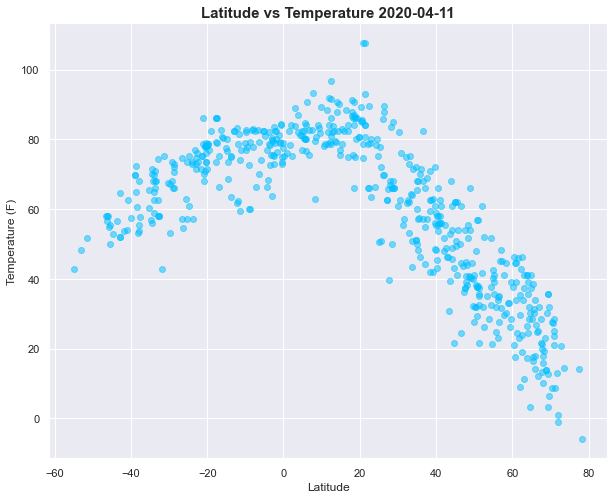

In [31]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Max Temp (F)"], color='deepskyblue', alpha=0.5)
date = date.today()
plt.xlabel('Latitude')
plt.ylabel('Temperature (F)')
plt.title(f'Latitude vs Temperature {date}', fontsize = 15, fontweight = "bold")
plt.savefig("LatVsTemp.png")
plt.show()

In [ ]:
# After each plot add a sentence or too explaining what the code is and analyzing.

# LATITUDE VS. TEMPERATURE: Temperature decreases towards the highest and lowest latitudes. 
#                           Temperature is high in the middle, which is the equator. 

#### Latitude vs. Humidity Plot

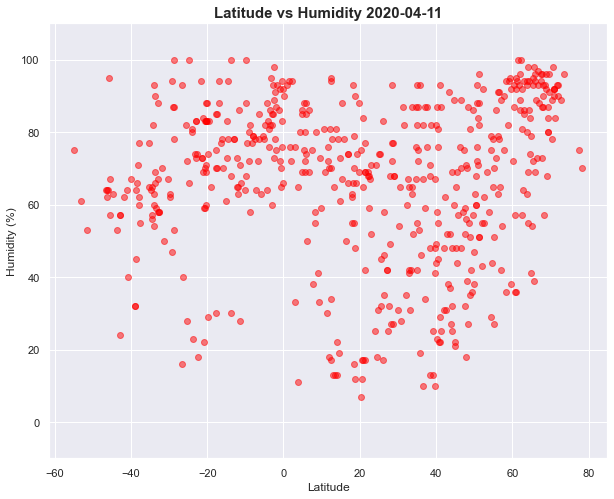

In [37]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Humidity (%)"], color='red', alpha=0.5)
date = date.today()
plt.ylim(-10, 110)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Latitude vs Humidity {date}', fontsize = 15, fontweight = "bold")
plt.savefig("LatVsHumidity.png")
plt.show()

In [ ]:
# LATITUDE VS. HUMIDITY: Latitude and Humidity have a very weak correlation. 

#### Latitude vs. Cloudiness Plot

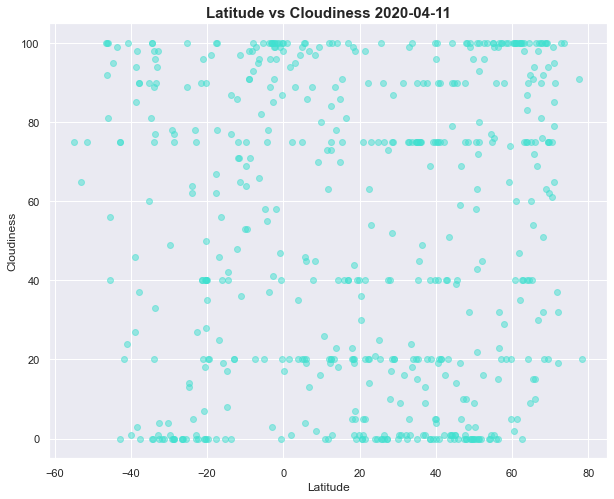

In [39]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color='turquoise', alpha=0.5)
date = date.today()
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'Latitude vs Cloudiness {date}', fontsize = 15, fontweight = "bold")
plt.savefig("LatVsCloudiness.png")
plt.show()

In [ ]:
# LATITUDE VS. CLOUDINESS: Latitude and Cloudiness show no correlation. 

#### Latitude vs. Wind Speed Plot

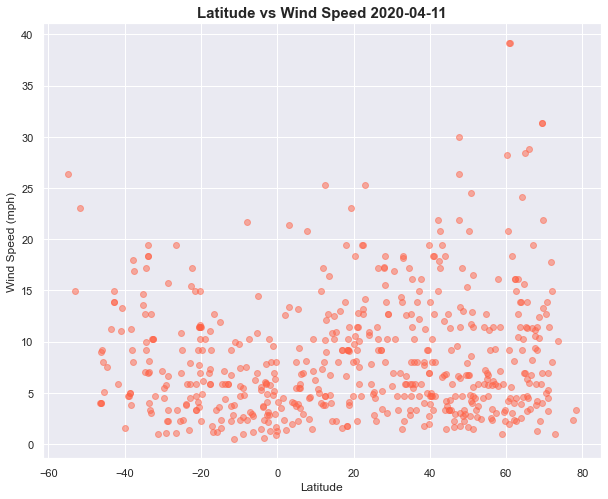

In [40]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(weather_df["Lat"], weather_df["Wind Speed (mph)"], color='tomato', alpha=0.5)
date = date.today()
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Latitude vs Wind Speed {date}', fontsize = 15, fontweight = "bold")
plt.savefig("LatVsWind.png")
plt.show()

In [ ]:
# LATITUDE VS. WIND SPEED: Latitude and Cloudiness show a very weak correlation. 

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots


In [41]:
# Northern Hemisphere (greater than or equal to 0 degrees latitude) 
# Southern Hemisphere (less than 0 degrees latitude)
bins = [-180, -0.000001, 180]
group = ["southern", "northern"]
# Create Northern and Southern Hemisphere DataFrames
weather_df["Locations"]= pd.cut(weather_df["Lat"], bins, labels=group)
weather_df

City  Cloudiness Country        Date  Humidity (%)    Lat  \
City ID                                                                     
0              Semey          58      KZ  1586642334            68  50.41   
1            Teguise          20      ES  1586642307            68  29.06   
2             Hobart          75      AU  1586642093            57 -42.88   
3               Faya          44      SA  1586642335            55  18.39   
4          Patnongon           0      PH  1586642336            69  10.91   
...              ...         ...     ...         ...           ...    ...   
554           Domoni          48      KM  1586642804            73 -12.26   
555         Misratah           0      LY  1586642804            60  32.38   
556      Mozarlândia           8      BR  1586642804            73 -14.74   
557           Gashua         100      NG  1586642805            13  12.87   
558       Oranjestad          20      AW  1586642541            70  12.52   

           Long  Max Temp (F)  Wind Speed (mph) Locations  
City ID                                                    
0         80.23         38.30              4.81  northern  
1        -13.56         66.20             12.75  northern  
2        147.33         52.00             13.87  southern  
3         42.45         66.20              1.81  northern  
4        121.99         78.58              4.97  northern  
...         ...           ...               ...       ...  
554       44.53         83.37              6.78  southern  
555       15.09         61.74             14.34  northern  
556      -50.57         80.11              1.57  southern  
557       11.05         83.82              8.97  northern  
558      -70.03         86.00             25.28  northern  

[559 rows x 10 columns]

In [42]:
# Split dataframe above into two new dataframes
northern = weather_df[weather_df["Locations"]=="northern"]
southern = weather_df[weather_df["Locations"]=="southern"]
 

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

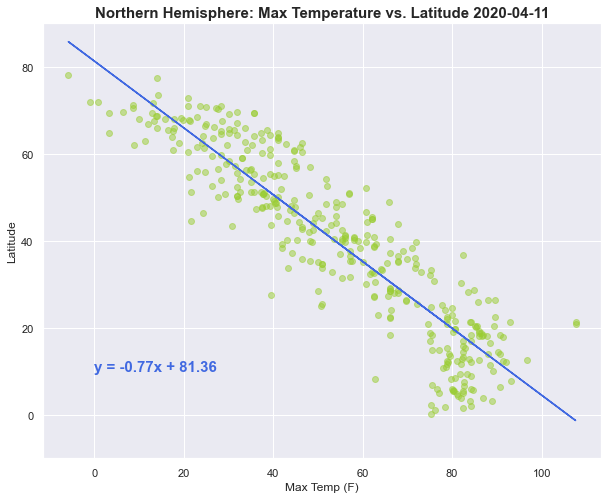

In [49]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern["Max Temp (F)"], northern["Lat"], color='yellowgreen', alpha=0.5)
date = date.today()
plt.ylim(-10, 90)
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere: Max Temperature vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")


north_lat = northern["Lat"]
north_temp = northern["Max Temp (F)"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_temp,north_lat)
regress_values = north_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_temp,regress_values,"r-", color = "royalblue")
plt.annotate(line_eq,(0,10),fontsize=15, color="royalblue", fontweight = "bold")
plt.savefig("NorthHem_TempvsLat.png")
plt.show()

In [45]:
print(rvalue)
# Northern Hemisphere: Max Temperature vs. Latitude: Strong negative correlation; Temperature increases as the Latitude decreases 

-0.9076548557018228


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

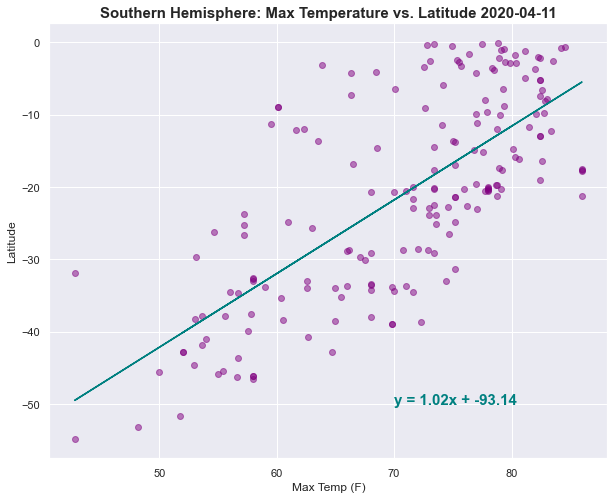

In [51]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern["Max Temp (F)"], southern["Lat"], color='purple', alpha=0.5)
date = date.today()
plt.xlabel('Max Temp (F)')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere: Max Temperature vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")


south_lat = southern["Lat"]
south_temp = southern["Max Temp (F)"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_temp,south_lat)
regress_values = south_temp * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_temp,regress_values,"r-", color = "teal")
plt.annotate(line_eq,(70,-50),fontsize=15, color="teal", fontweight = "bold")
plt.savefig("SouthHem_TempvsLat.png")
plt.show()

In [47]:
print(rvalue)
# Southern Hemisphere: Max Temperature vs. Latitude: Strong positive correlation; Temperature increases as the Latitude increases

0.7218214613027275


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

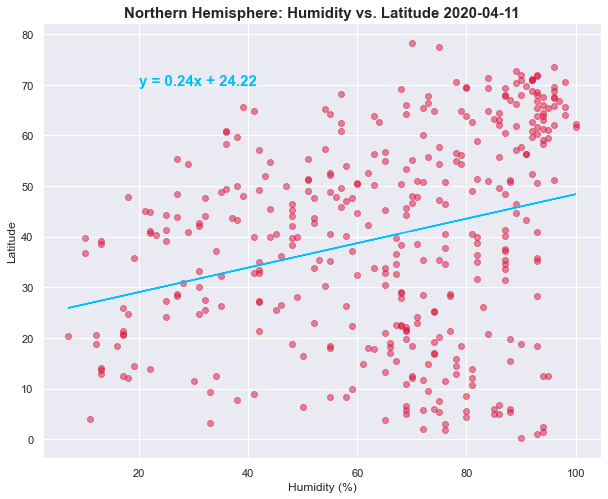

In [52]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern["Humidity (%)"], northern["Lat"], color='crimson', alpha=0.5)
date = date.today()
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere: Humidity vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")


north_lat = northern["Lat"]
north_humd = northern["Humidity (%)"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_humd,north_lat)
regress_values = north_humd * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_humd,regress_values,"r-", color = "deepskyblue")
plt.annotate(line_eq,(20,70),fontsize=15, color="deepskyblue", fontweight = "bold")
plt.savefig("NorthHem_HumdvsLat.png")
plt.show()

In [53]:
print(rvalue)
# Northern Hemisphere: Humidity vs. Latitude: Weak positive correlation; HUmidity increases as the Latitude increases 
#                                             but the data is quite scattered 

0.2839752076740174


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

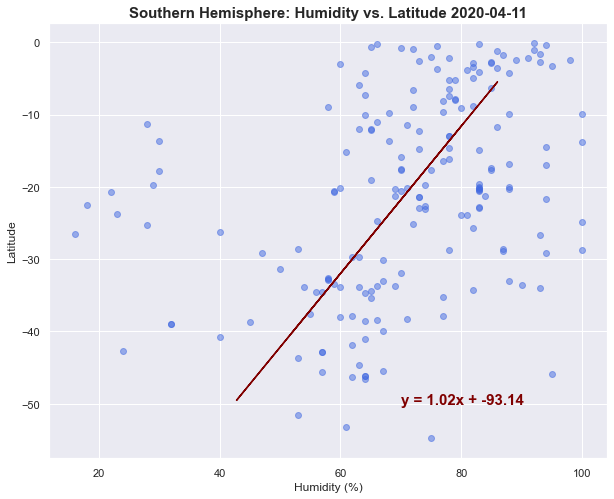

In [58]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern["Humidity (%)"], southern["Lat"], color='royalblue', alpha=0.5)
date = date.today()
plt.xlabel('Humidity (%)')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere: Humidity vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")


south_lat = southern["Lat"]
south_humd = southern["Max Temp (F)"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_humd,south_lat)
regress_values = south_humd * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_humd,regress_values,"r-", color = "maroon")
plt.annotate(line_eq,(70,-50),fontsize=15, color="maroon", fontweight = "bold")
plt.savefig("SouthHem_HumdvsLat.png")
plt.show()

In [57]:
print(rvalue)
# Northern Hemisphere: Humidity vs. Latitude: Strong positive correlation; Humidity increases as the Latitude increases 


0.7218214613027275


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

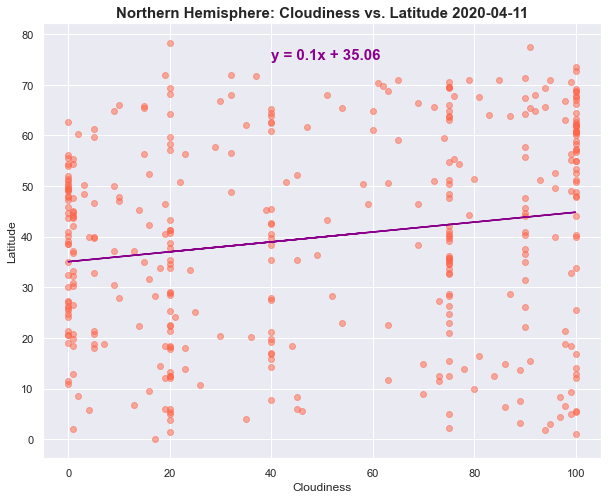

In [59]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern["Cloudiness"], northern["Lat"], color='tomato', alpha=0.5)
date = date.today()
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere: Cloudiness vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")

north_lat = northern["Lat"]
north_cloud = northern["Cloudiness"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_cloud,north_lat)
regress_values = north_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_cloud,regress_values,"r-", color = "darkmagenta")
plt.annotate(line_eq,(40,75),fontsize=15, color="darkmagenta", fontweight = "bold")
plt.savefig("NorthHem_CloudvsLat.png")
plt.show()

In [61]:
print(rvalue)
# Northern Hemisphere: Cloudiness vs. Latitude: Very weak positive correlation; Data is scattered.  


0.18068595412291583


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

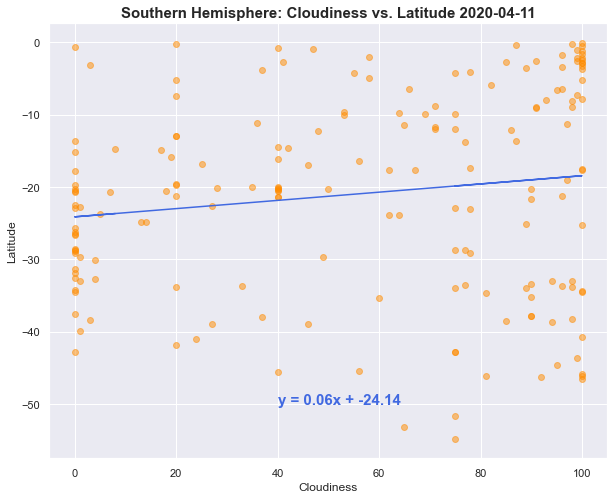

In [62]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern["Cloudiness"], southern["Lat"], color='darkorange', alpha=0.5)
date = date.today()
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere: Cloudiness vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")


south_lat = southern["Lat"]
south_cloud = southern["Cloudiness"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_cloud,south_lat)
regress_values = south_cloud * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_cloud,regress_values,"r-", color = "royalblue")
plt.annotate(line_eq,(40,-50),fontsize=15, color="royalblue", fontweight = "bold")
plt.savefig("SouthHem_CloudvsLat.png")
plt.show()

In [63]:
print(rvalue)
# Southern Hemisphere: Cloudiness vs. Latitude: Very weak positive correlation; Data is scattered.  


0.15145570649152193


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

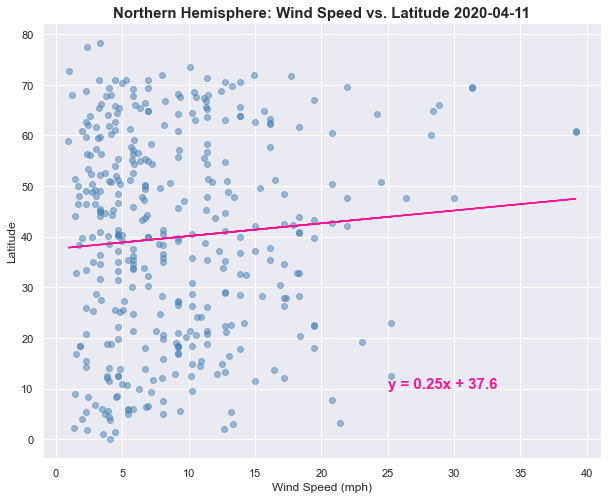

In [64]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(northern["Wind Speed (mph)"], northern["Lat"], color='steelblue', alpha=0.5)
date = date.today()
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title(f'Northern Hemisphere: Wind Speed vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")


north_lat = northern["Lat"]
north_wind = northern["Wind Speed (mph)"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(north_wind,north_lat)
regress_values = north_wind * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(north_wind,regress_values,"r-", color = "deeppink")
plt.annotate(line_eq,(25,10),fontsize=15, color="deeppink", fontweight = "bold")
plt.savefig("NorthHem_WindvsLat.png")
plt.show()

In [65]:
print(rvalue)
# Northern Hemisphere: Wind Speed vs. Latitude: Very weak positive correlation; Data is scattered.  


0.07978448351669756


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

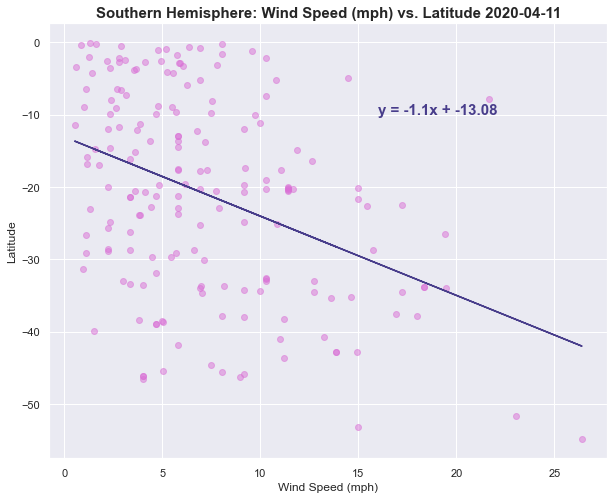

In [67]:
plt.figure(figsize=(10,8))
sns.set()
plt.scatter(southern["Wind Speed (mph)"], southern["Lat"], color='orchid', alpha=0.5)
date = date.today()
plt.xlabel('Wind Speed (mph)')
plt.ylabel('Latitude')
plt.title(f'Southern Hemisphere: Wind Speed (mph) vs. Latitude {date}', fontsize = 15, fontweight = "bold")
# plt.savefig("LatVsTemp.png")


south_lat = southern["Lat"]
south_wind = southern["Wind Speed (mph)"]

# Plot the linear regression model on top of the previous scatter plot.
(slope, intercept, rvalue, pvalue, stderr) = linregress(south_wind,south_lat)
regress_values = south_wind  * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(south_wind,regress_values,"r-", color = "darkslateblue")
plt.annotate(line_eq,(16,-10),fontsize=15, color="darkslateblue", fontweight = "bold")
plt.savefig("SouthHem_WindvsLat.png")
plt.show()

In [69]:
print(rvalue)
# Northern Hemisphere: Wind Speed vs. Latitude: weak negative correlation; Data is scattered but the wind speed increases towards lower latitudes 


-0.38780130311728267
